In [103]:
import pandas as pd
df = pd.read_excel(r'C:\Users\stvma\Downloads\Data analyst Data.xlsx')



In [104]:
# Q.1. Calculate the number of unique students
unique_students = df['First Name'].nunique()
print(f"The dataset contains {unique_students} unique students.")

The dataset contains 2324 unique students.


In [105]:
# Q.2. Calculate the average GPA of the students
average_gpa = df['CGPA'].mean()
print(f"The average GPA of the students is {average_gpa:.2f}.")


The average GPA of the students is 8.04.


In [106]:
# Q.3. Calculate the distribution of students across different graduation years
graduation_year_distribution = df['Year of Graduation'].value_counts()
print("Distribution of students across different graduation years:")
print(graduation_year_distribution)

Distribution of students across different graduation years:
Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64


In [107]:
# Q.4) Calculate the distribution of student's experience with Python programming
python_experience_distribution = df['Experience with python (Months)'].value_counts()
print("Distribution of student's experience with Python programming:")
print(python_experience_distribution)


Distribution of student's experience with Python programming:
Experience with python (Months)
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: count, dtype: int64


In [108]:
#Q.5) Calculate the average family income of the students
import re

# Define a function to calculate the mean from income range strings
def calculate_mean(income_range):
    # Check if the income_range is already a float value
    if isinstance(income_range, float):
        return income_range
    
    # Use regular expressions to extract numerical values
    values = [float(match) for match in re.findall(r'\d+\.\d+|\d+', str(income_range))]
    
    # Calculate the mean
    if values:
        return sum(values) / len(values)
    else:
        return None

# Apply the calculate_mean function to the 'Family Income' column
df['Family Income'] = df['Family Income'].apply(calculate_mean)

average_family_income = df['Family Income'].mean()

print(f"The average family income of the students is: {average_family_income:.2f} Lakh")

The average family income of the students is: 1.29 Lakh


In [109]:
#Q.6) Calculate the GPA variation among different colleges (show top 5 results only)
gpa_variation_by_college = df.groupby('College Name')['CGPA'].mean().nlargest(5)
print("GPA variation among different colleges (top 5 results):")
print(gpa_variation_by_college)


GPA variation among different colleges (top 5 results):
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


In [110]:
# Q.7) Are there any outliers in the 'attendingstatus' & 'quantity (number of courses completed)' attribute?

import pandas as pd
from scipy import stats

# Replace 'NAN' with 0 and 'Attending' with 1 in 'Attendee Status'
df['Attendee Status'] = df['Attendee Status'].replace('NAN', 0)
df['Attendee Status'] = df['Attendee Status'].replace('Attending', 1)
df['Attendee Status'] = df['Attendee Status'].astype(int)

# Convert 'Quantity' column to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Replace NaN values with 0 for 'Quantity'
df['Quantity'].fillna(0, inplace=True)

# Calculate Z-scores for 'Attendee Status' and 'Quantity'
z_scores_attendee = stats.zscore(df['Attendee Status'])
z_scores_quantity = stats.zscore(df['Quantity'])

# Define a threshold for considering values as outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers for 'Attendee Status'
outliers_attendee = df[abs(z_scores_attendee) > threshold]

# Identify outliers for 'Quantity'
outliers_quantity = df[abs(z_scores_quantity) > threshold]

# Check if there are any outliers
if not outliers_attendee.empty:
    print("\nOutliers in 'Attendee Status':")
    print(outliers_attendee[['Events', 'Attendee Status']].to_string())
else:
    print("\nNo outliers found in 'Attendee Status'.")

if not outliers_quantity.empty:
    print("\nOutliers in 'Quantity':")
    print(outliers_quantity[['Events', 'Quantity']].to_string())
else:
    print("\nNo outliers found in 'Quantity'.")



Outliers in 'Attendee Status':
                                       Events  Attendee Status
78                     Art of Resume Building                0
80                     Art of Resume Building                0
121                    Art of Resume Building                0
139                    Art of Resume Building                0
358         Data Visualization using Power BI                0
447         Data Visualization using Power BI                0
448         Data Visualization using Power BI                0
487         Data Visualization using Power BI                0
1362  Internship Program(IP) Success Conclave                0
2144              Product Design & Full Stack                0
3572                   Art of Resume Building                0
3585                   Art of Resume Building                0

No outliers found in 'Quantity'.


In [111]:
# 8) Calculate the average GPA for each city
average_gpa_by_city = df.groupby('City')['CGPA'].mean()
print("Average GPA for each city:")
print(average_gpa_by_city)

Average GPA for each city:
City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


In [112]:
# 9) Identify any relationship between family income and GPA
correlation_family_income_gpa = df['Family Income'].corr(df['CGPA'])
print(f"The correlation between family income and GPA is {correlation_family_income_gpa:.2f}.")

The correlation between family income and GPA is 0.02.


<Axes: >

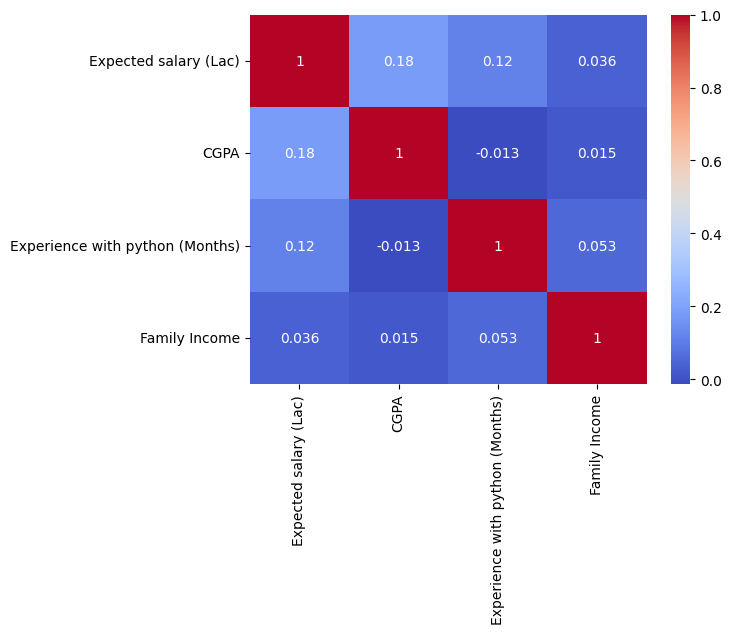

In [113]:

# 10) How does the expected salary vary based on factors like GPA, experience with Python, and family income?
# Create a new DataFrame with the relevant columns
import seaborn as sns
salary_analysis_df = df[['Expected salary (Lac)', 'CGPA', 'Experience with python (Months)', 'Family Income']]

# Calculate the correlation matrix
correlation_matrix = salary_analysis_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [114]:
# 11) Identify the event that attracts more students from specific fields of study

# Print the results
print("Event that attracts more students from specific fields of study:")
print(most_popular_event_by_college)
# Group the data by event and college name, and count the occurrences
event_college_counts = df.groupby(['Events', 'College Name']).size()

# Find the event with the highest count for each college
most_popular_event_by_college = event_college_counts.groupby('College Name').idxmax().reset_index()

# Print the results
print("Event that attracts more students from specific fields of study:")
print(most_popular_event_by_college)


Event that attracts more students from specific fields of study:
                                         College Name  \
0                  A. C. Patil College of Engineering   
1                   ADHIYAMAAN COLLEGE OF ENGINEERING   
2                    AP SHAH INSTITUTE OF TECHNOLOGY    
3   B. K. Birla College of Arts, Science & Commerc...   
4   CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVE...   
5   D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
6   DKTE Society's Textile And Engineering Institu...   
7        Don Bosco College of Engineering Fatorda Goa   
8   G H Raisoni institut of engineering and techno...   
9                  GOVERNMENT POLYTECHNIC GANDHINAGAR   
10  KLE Society's College of BCA, RLS Institute, B...   
11     LD College of engineering, Ahmedabad, Gujarat    
12  LOKMANYA TILAK COLLEGE OF ENGINEERING KOPARKHA...   
13           Late G. N. Sapkal College Of Engineering   
14                 MIT Academy Of Engineering ,Alandi   
15  New horizon institu

In [115]:
#12.Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

# Calculate average GPA and expected salary for students in leadership positions
avg_gpa_leaders = df[df['Leadership- skills'] == 'yes']['CGPA'].mean()
avg_salary_leaders = df[df['Leadership- skills'] == 'yes']['Expected salary (Lac)'].mean()

# Calculate average GPA and expected salary for students not in leadership positions
avg_gpa_non_leaders = df[df['Leadership- skills'] == 'no']['CGPA'].mean()
avg_salary_non_leaders = df[df['Leadership- skills'] == 'no']['Expected salary (Lac)'].mean()
print("Average GPA for leaders: ", avg_gpa_leaders)
print("Average expected salary for leaders: ", avg_salary_leaders)
print("Average GPA for non-leaders: ", avg_gpa_non_leaders)
print("Average expected salary for non-leaders: ", avg_salary_non_leaders)
print("Therefore,")
# Compare averages and print results
if avg_gpa_leaders > avg_gpa_non_leaders:
    print("Students in leadership positions tend to have higher GPAs.")
else:
    print("Students in leadership positions do not tend to have higher GPAs.")

if avg_salary_leaders > avg_salary_non_leaders:
    print("While they tend to have better expected salaries.")
else:
    print("While they do not tend to have better expected salaries.")

Average GPA for leaders:  8.036787247087677
Average expected salary for leaders:  13.971796443899448
Average GPA for non-leaders:  8.040444274224436
Average expected salary for non-leaders:  13.795097663730372
Therefore,
Students in leadership positions do not tend to have higher GPAs.
While they tend to have better expected salaries.


In [116]:
#Q.13) Is there a strong correlation between leadership skills and expected salary?
df = pd.read_excel(r'C:\Users\stvma\Downloads\Data analyst Data.xlsx')
# Convert leadership skills to numerical values
df['Leadership- skills'] = df['Leadership- skills'].map({'yes': 1, 'no': 0})

# Convert 'Expected salary (Lac)' to numeric values
df['Expected salary (Lac)'] = pd.to_numeric(df['Expected salary (Lac)'], errors='coerce')

# Calculate correlation
correlation = df['Leadership- skills'].corr(df['Expected salary (Lac)'])

# Print correlation coefficient
print("Correlation coefficient: ", correlation)

# Interpret correlation and print result
if abs(correlation) > 0.5:
    print("Yes, there is a strong correlation between leadership skills and expected salary.")
else:
    print("No, there is not a strong correlation between leadership skills and expected salary.")

Correlation coefficient:  0.013367103770824451
No, there is not a strong correlation between leadership skills and expected salary.


In [117]:
# Q.14) How many students are graduating by the end of 2024?
# Count the number of students graduating by the end of 2024
num_students_graduating_by_2024 = df[df['Year of Graduation'] <= 2024].shape[0]

print("Number of students graduating by the end of 2024: ", num_students_graduating_by_2024)

Number of students graduating by the end of 2024:  3047


In [118]:
# Q.15) Which promotion channel brings in more student participations?
# Split the 'How did you come to know about this event?' column and count the occurrences of each channel
channel_counts = df['How did you come to know about this event?'].str.split(' | ', expand=True).stack().value_counts()

# Find the channel with the maximum count
max_participation_channel = channel_counts.idxmax()

print("Promotion channel that brings in more student participations: ", max_participation_channel)

Promotion channel that brings in more student participations:  Whatsapp


In [119]:
# Q.16) How many students attended Data Science events?
# Filter the DataFrame to only include rows where the 'Event' contains 'Data Science'
data_science_events = df[df['Events'].str.contains('Data')]

# Count the number of students who attended Data Science events
num_students_data_science = data_science_events.shape[0]

print("Number of students who attended Data Science events: ", num_students_data_science)

Number of students who attended Data Science events:  455


In [120]:
# Q.17) Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)
# Define 'high' CGPA and 'more' experience in language as being above the median
high_cgpa = df['CGPA'].median()
more_experience = df['Experience with python (Months)'].median()

# Filter the DataFrame to only include students with high CGPA and more experience in language
high_cgpa_more_experience = df[(df['CGPA'] > high_cgpa) & (df['Experience with python (Months)'] > more_experience)]

# Calculate the average expected salary of these students
avg_salary_high_cgpa_more_experience = high_cgpa_more_experience['Expected salary (Lac)'].mean()

print("Average expected salary of students with high CGPA and more experience in language: ", avg_salary_high_cgpa_more_experience)

Average expected salary of students with high CGPA and more experience in language:  16.720192307692308


In [121]:
#Q.18) How many students know about the event from their colleges? Which of these Top 5 colleges?
# Fill in missing values in the 'How did you come to know about this event?' column with an empty string
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].fillna('')

# Filter the DataFrame to only include students who heard about the event from their colleges
college_students = df[df['How did you come to know about this event?'].str.contains('college', case=False)]

# Count the number of these students
num_college_students = college_students.shape[0]

# Find the top 5 colleges among these students
top_colleges = college_students['College Name'].value_counts().head(5)

print("Number of students who heard about the event from their colleges: ", num_college_students)
print("Top 5 colleges among these students: ", top_colleges)

Number of students who heard about the event from their colleges:  434
Top 5 colleges among these students:  College Name
vidyalankar institute of technology, mumbai              23
kle society's college of bca, rls institute, belagavi    23
mit academy of engineering ,alandi                       23
ld college of engineering, ahmedabad, gujarat            20
priyadarshini college of engineering, nagpur             20
Name: count, dtype: int64
